In [1192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve,auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor,VotingClassifier
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import plotly.express as px
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
import os
warnings.filterwarnings('ignore')

In [1194]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing and Cleansing

In [1197]:
df.shape

(5110, 12)

In [1198]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1199]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1201]:
df=df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [1202]:
df.duplicated().sum()

0

In [1203]:
df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [1204]:
sorted(df['age'].unique().tolist())[0:13]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08]

In [1205]:
df['age']=np.ceil(df['age'])
sorted(df['age'].unique().tolist())[0:13]

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

In [1208]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [1209]:
df.drop(df[df['gender']=='Other'].index,inplace=True)

In [1215]:
df['stroke'].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

In [1216]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [1217]:
df.drop(columns=['id'],inplace=True)

In [1218]:
plt.style.use('dark_background')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

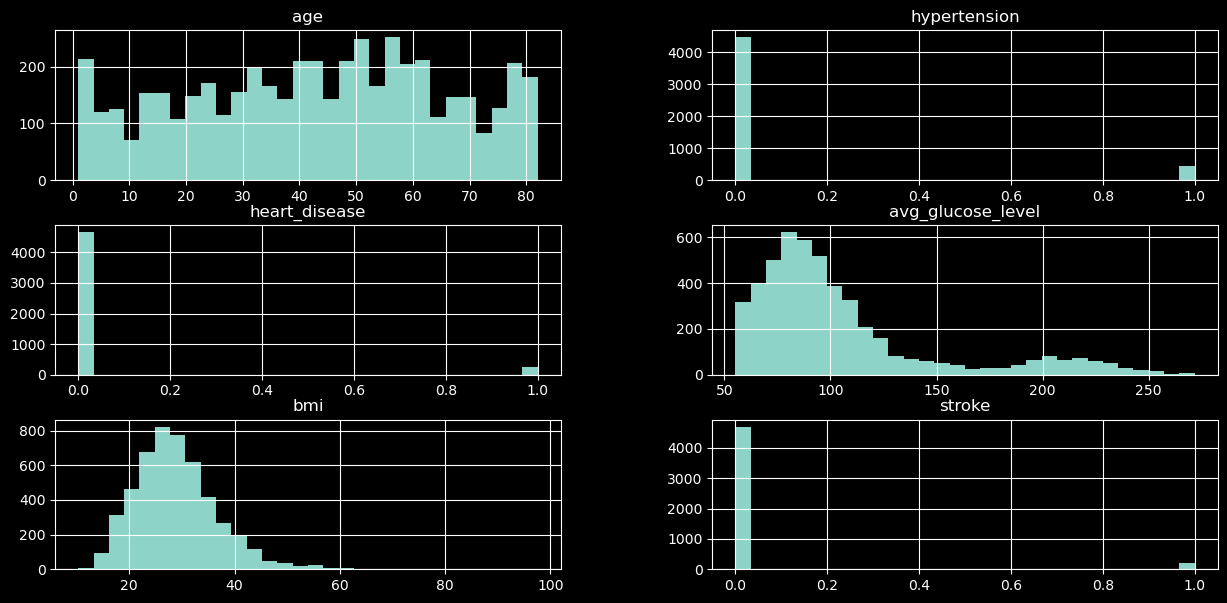

In [1219]:
df.hist(bins=30,figsize=(15,7))

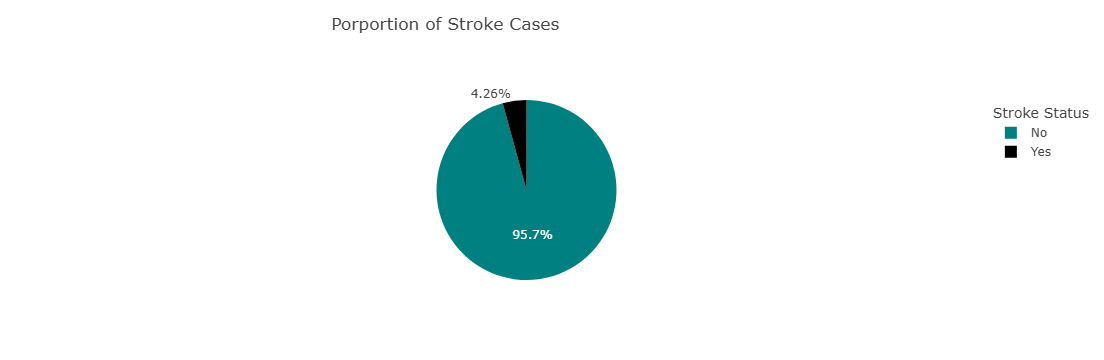

In [1220]:
fig=px.pie(
    df['stroke'].value_counts(),values=df['stroke'].value_counts().values,names=['No','Yes'],
    title='Porportion of Stroke Cases',
    color_discrete_sequence=['#008080','black']
)
fig.update_layout(legend_title_text='Stroke Status',title_x=0.3,title_y=0.95)
fig.show()

In [1221]:
stroke_data=df[df['stroke']==1]
non_stroke_data=df[df['stroke']==0]

In [1222]:
stroke_data['bmi'].mean()

30.471291866028707

In [1223]:
non_stroke_data['bmi'].mean()

28.82443072994254

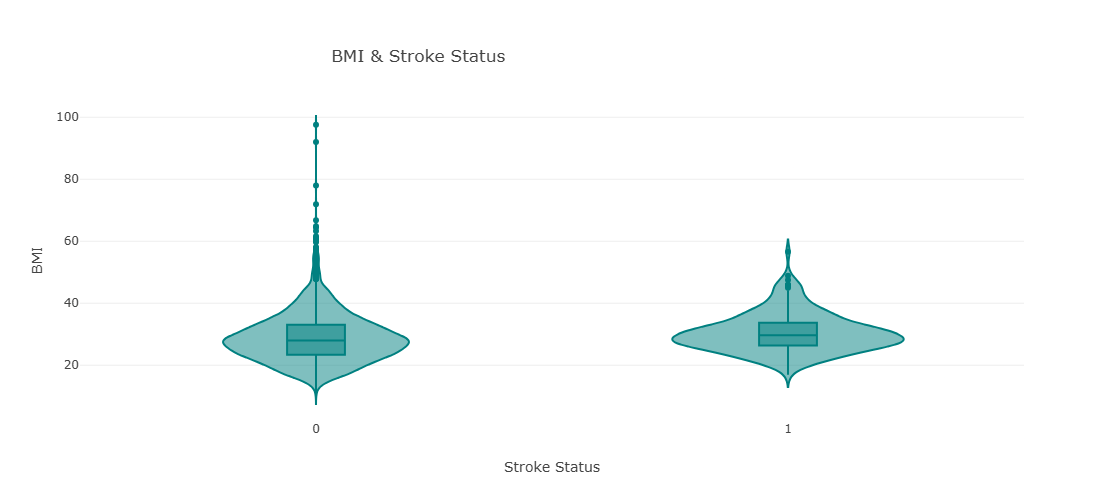

In [1224]:
fig=px.violin(df,y='bmi',x='stroke',box=True,width=700,height=500,color_discrete_sequence=['#008080','black'],
             title='BMI & Stroke Status',labels={'stroke':'Stroke Status','bmi':'BMI'})
fig.update_layout(title_x=0.3,title_y=0.9)
fig.show()

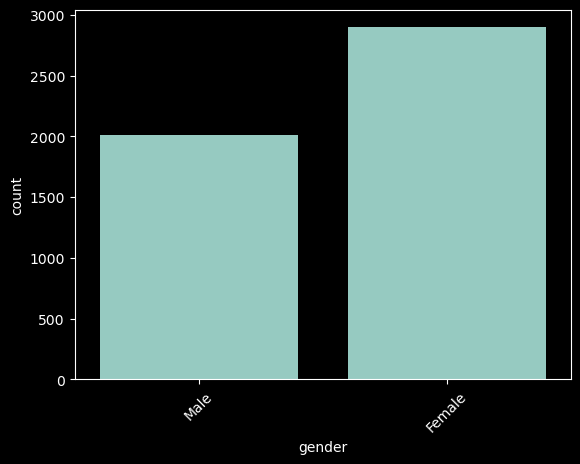

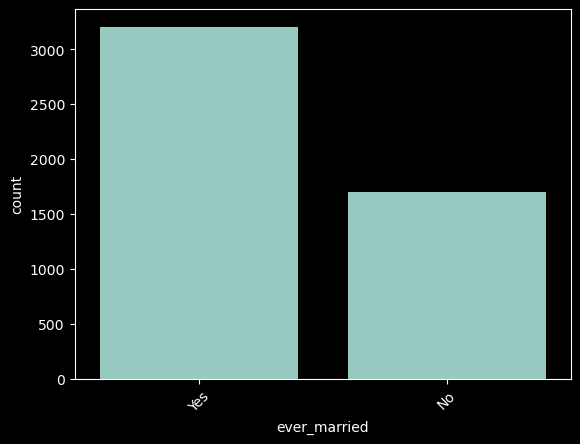

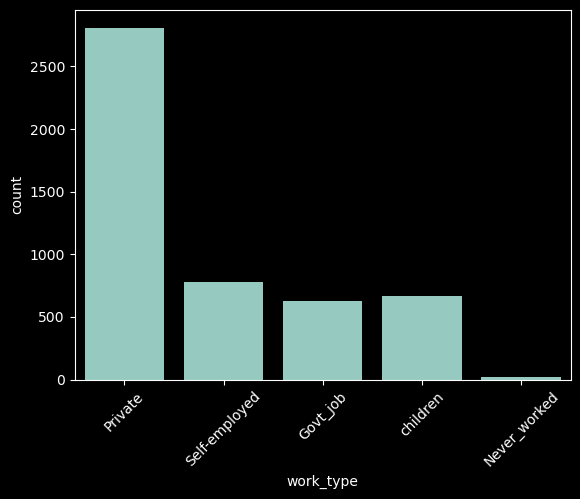

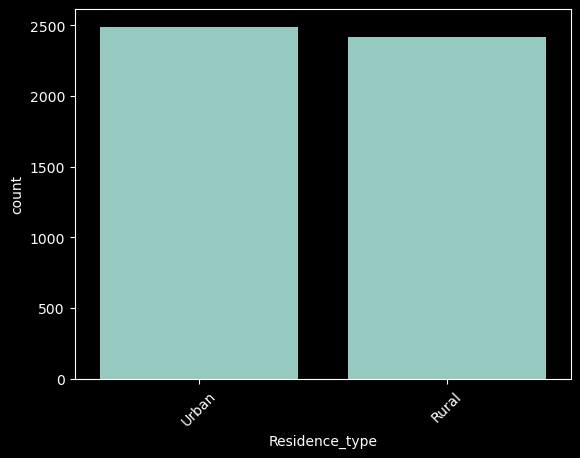

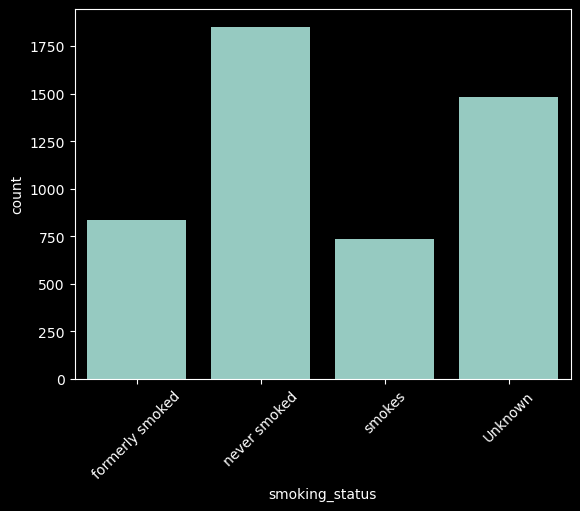

In [1225]:
categorical=['gender','ever_married','work_type','Residence_type','smoking_status']
numeric_features = ["age", "avg_glucose_level", "bmi"] 
for col in categorical:
    sns.countplot(x=df[f'{col}'],data=df)
    plt.xticks(rotation=45)
    plt.show()

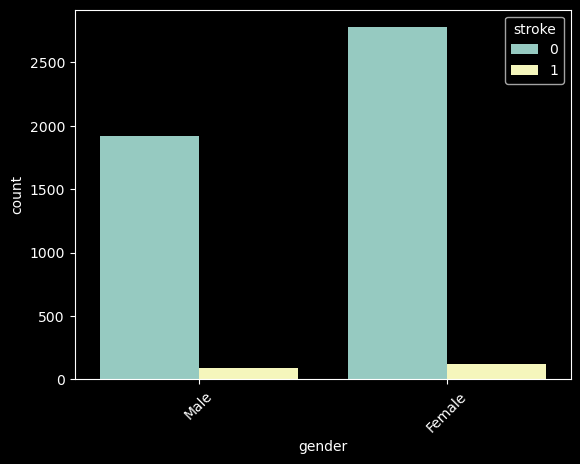

In [1226]:
sns.countplot(x='gender',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

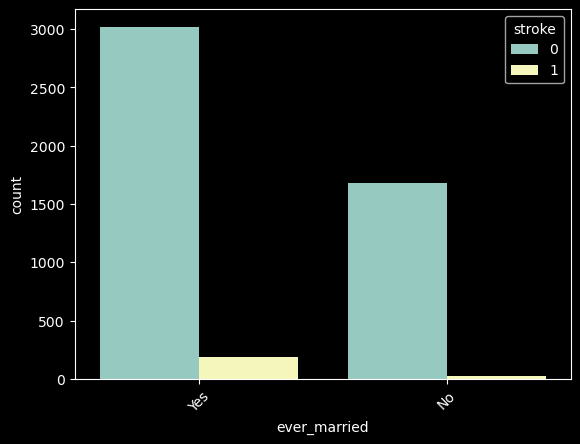

In [1227]:
sns.countplot(x='ever_married',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

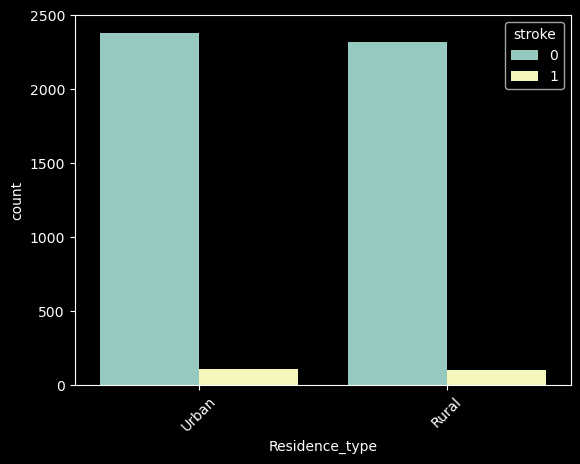

In [1230]:
sns.countplot(x='Residence_type',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

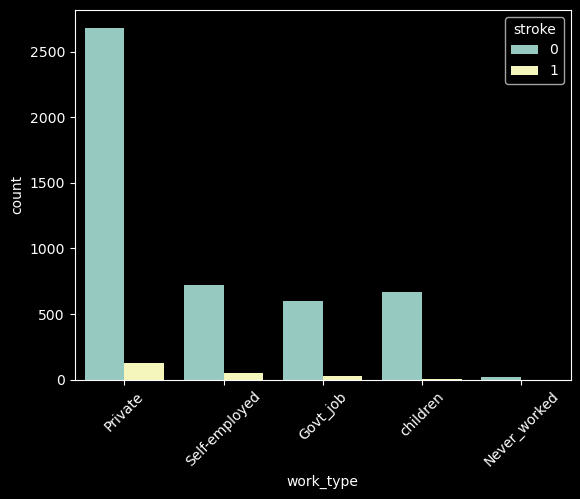

In [1231]:
sns.countplot(x='work_type',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

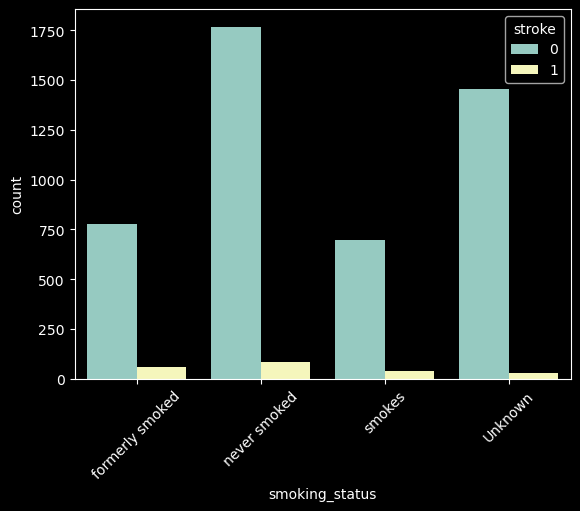

In [1232]:
sns.countplot(x='smoking_status',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

In [1236]:
df['smoking_status']=df['smoking_status'].replace('Unknown','No Info')

In [1238]:
df['age_hyper']=df_linear['age']*df_linear['hypertension']
df["hyp_hd"] = df_linear["hypertension"] & df_linear["heart_disease"]

# Feature Scaling

In [1240]:
df_linear=df.copy()
df_tree=df.copy()

In [1241]:
scaler=StandardScaler()
df_linear[numeric_features]=scaler.fit_transform(df_linear[numeric_features])
df_linear

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_hyper,hyp_hd
0,Male,1.070411,0,1,Yes,Private,Urban,2.777797,0.981145,formerly smoked,1,0.00000,0
2,Male,1.647328,0,1,Yes,Private,Rural,0.014016,0.459086,never smoked,1,0.00000,0
3,Female,0.271604,0,0,Yes,Private,Urban,1.484266,0.701016,smokes,1,0.00000,0
4,Female,1.602950,1,0,Yes,Self-employed,Rural,1.549325,-0.623231,never smoked,1,1.60295,0
5,Male,1.691706,0,0,Yes,Private,Urban,1.821493,0.013426,formerly smoked,1,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,-1.326011,0,0,No,children,Rural,-0.049918,-1.310821,No Info,0,-0.00000,0
5106,Female,1.691706,0,0,Yes,Self-employed,Urban,0.448045,1.414072,never smoked,0,0.00000,0
5107,Female,-0.349691,0,0,Yes,Self-employed,Rural,-0.502181,0.217156,never smoked,0,-0.00000,0
5108,Male,0.360360,0,0,Yes,Private,Rural,1.373057,-0.419501,formerly smoked,0,0.00000,0


# Encoding

In [1243]:
le=LabelEncoder()
for col in categorical:
    if col != 'smoking_status': 
        df_tree[f'{col}']=le.fit_transform(df_tree[f'{col}'])
        df_linear[f'{col}']=le.fit_transform(df_linear[f'{col}'])

In [1244]:
ord=OrdinalEncoder(categories=[['No Info','never smoked','formerly smoked','smokes']])
df_tree['smoking_status']=ord.fit_transform(df_tree[['smoking_status']])
df_tree['smoking_status']
df_linear['smoking_status']=ord.fit_transform(df_linear[['smoking_status']])
df_linear['smoking_status']

0       2.0
2       1.0
3       3.0
4       1.0
5       2.0
       ... 
5104    0.0
5106    1.0
5107    1.0
5108    2.0
5109    0.0
Name: smoking_status, Length: 4908, dtype: float64

In [1245]:
onehot=OneHotEncoder()
df_linear=pd.get_dummies(df_linear,columns=categorical,drop_first=False)
df_linear

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_hyper,hyp_hd,gender_0,gender_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0.0,smoking_status_1.0,smoking_status_2.0,smoking_status_3.0
0,1.070411,0,1,2.777797,0.981145,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
2,1.647328,0,1,0.014016,0.459086,1,0.00000,0,False,True,...,False,True,False,False,True,False,False,True,False,False
3,0.271604,0,0,1.484266,0.701016,1,0.00000,0,True,False,...,False,True,False,False,False,True,False,False,False,True
4,1.602950,1,0,1.549325,-0.623231,1,1.60295,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5,1.691706,0,0,1.821493,0.013426,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.326011,0,0,-0.049918,-1.310821,0,-0.00000,0,True,False,...,False,False,False,True,True,False,True,False,False,False
5106,1.691706,0,0,0.448045,1.414072,0,0.00000,0,True,False,...,False,False,True,False,False,True,False,True,False,False
5107,-0.349691,0,0,-0.502181,0.217156,0,-0.00000,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5108,0.360360,0,0,1.373057,-0.419501,0,0.00000,0,False,True,...,False,True,False,False,True,False,False,False,True,False


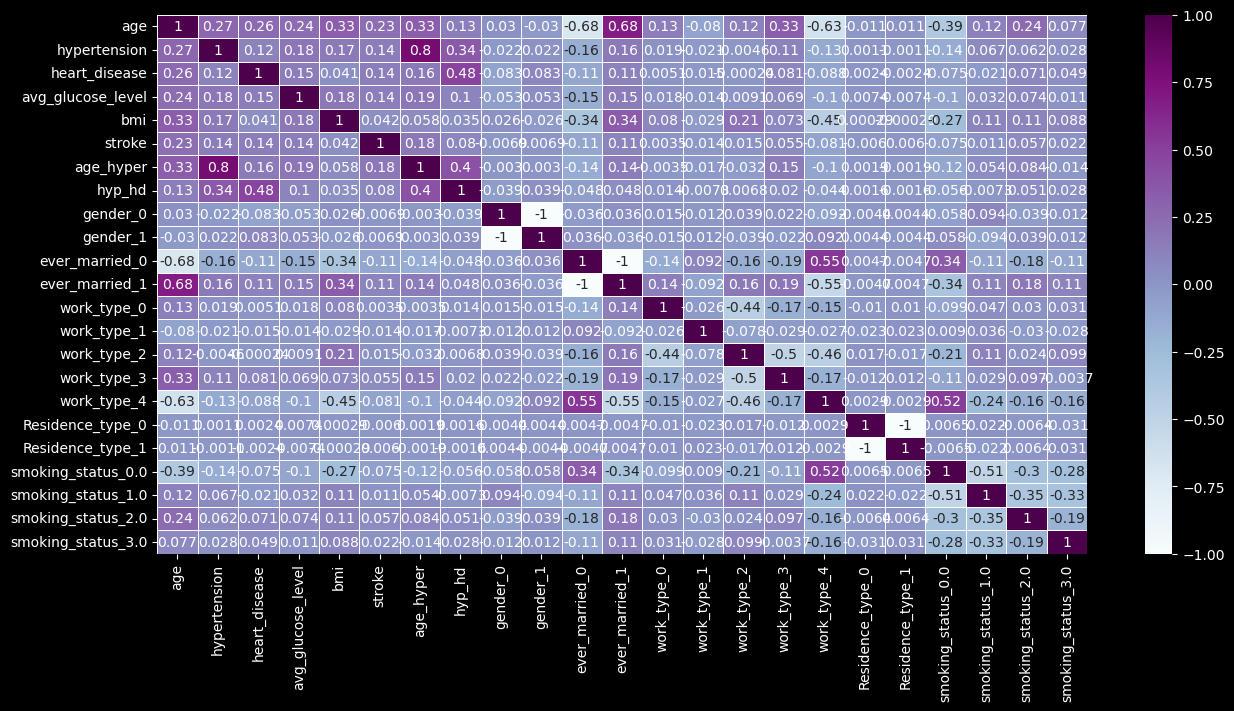

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_hyper,hyp_hd,gender_0,gender_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0.0,smoking_status_1.0,smoking_status_2.0,smoking_status_3.0
0,1.070411,0,1,2.777797,0.981145,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
2,1.647328,0,1,0.014016,0.459086,1,0.00000,0,False,True,...,False,True,False,False,True,False,False,True,False,False
3,0.271604,0,0,1.484266,0.701016,1,0.00000,0,True,False,...,False,True,False,False,False,True,False,False,False,True
4,1.602950,1,0,1.549325,-0.623231,1,1.60295,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5,1.691706,0,0,1.821493,0.013426,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.326011,0,0,-0.049918,-1.310821,0,-0.00000,0,True,False,...,False,False,False,True,True,False,True,False,False,False
5106,1.691706,0,0,0.448045,1.414072,0,0.00000,0,True,False,...,False,False,True,False,False,True,False,True,False,False
5107,-0.349691,0,0,-0.502181,0.217156,0,-0.00000,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5108,0.360360,0,0,1.373057,-0.419501,0,0.00000,0,False,True,...,False,True,False,False,True,False,False,False,True,False


In [1246]:
plt.figure(figsize=(15,7))
sns.heatmap(df_linear.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()
df_linear

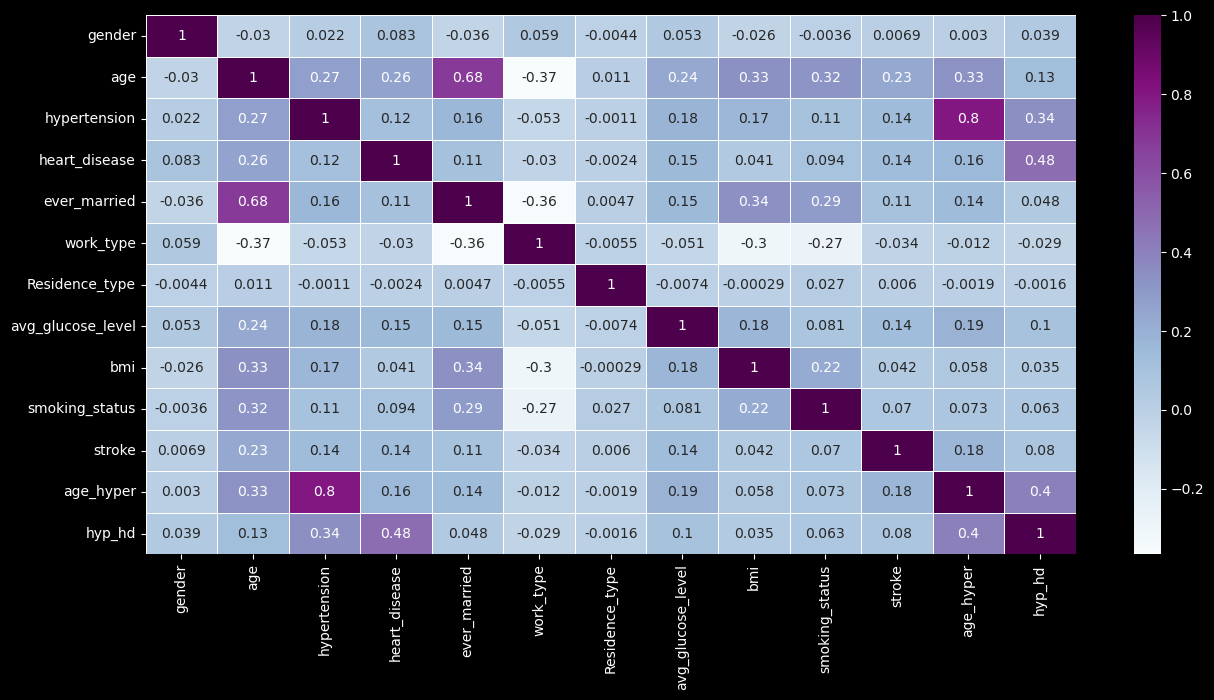

In [1247]:
plt.figure(figsize=(15,7))
sns.heatmap(df_tree.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [1248]:
print(df['stroke'].value_counts(normalize=True))

stroke
0    0.957416
1    0.042584
Name: proportion, dtype: float64


In [1249]:
x_linear=df_linear.drop(columns=['stroke'])
y_linear=df_linear['stroke']
x_tree=df_tree.drop(columns=['stroke'])
y_tree=df_tree['stroke']

In [1250]:
x_train_lin,x_test_lin,y_train_lin,y_test_lin=train_test_split(x_linear,y_linear,test_size=0.2,stratify=y_linear,random_state=42)
x_train_tree,x_test_tree,y_train_tree,y_test_tree=train_test_split(x_tree,y_tree,test_size=0.2,stratify=y_tree,random_state=42)

# Baseline Models

In [1252]:
models_and_grids = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5]}
    ),

    "SVM": (
        SVC(probability=True, random_state=42),
        {'C': [1, 10],
         'kernel': ['linear', 'rbf'],
         'class_weight': [None, 'balanced']}
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'C': [0.1, 1, 10],
         'penalty': ['l2'],
         'class_weight': [None, 'balanced']}
    ),

    "KNN": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}
    )
}

# --------------------------
# 4. Train & evaluate
# --------------------------
results = {}
for name, (model, param_grid) in models_and_grids.items():
    print(f"\n🔍 Training {name}...")
    if name in ["SVM", "LogisticRegression", "KNN"]:
        Xtr, Xte = x_train_lin,x_test_lin
    else:
        Xtr, Xte = x_train_tree,x_test_tree

    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    if name in ["SVM", "LogisticRegression", "KNN"]:
        grid.fit(Xtr, y_train_lin)
    else:
        grid.fit(Xtr,y_train_tree)
    y_pred = grid.best_estimator_.predict(Xte)

    print(f"✅ Best {name}: {grid.best_params_}")
    if name in ["SVM", "LogisticRegression", "KNN"]:
        print(classification_report(y_test_lin, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_lin, y_pred, digits=3, output_dict=True))
    else:
        print(classification_report(y_test_tree, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_tree, y_pred, digits=3, output_dict=True))


🔍 Training RandomForest...
✅ Best RandomForest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0      0.962     0.937     0.949       940
           1      0.106     0.167     0.130        42

    accuracy                          0.904       982
   macro avg      0.534     0.552     0.539       982
weighted avg      0.925     0.904     0.914       982


🔍 Training DecisionTree...
✅ Best DecisionTree: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0      0.970     0.834     0.897       940
           1      0.103     0.429     0.167        42

    accuracy                          0.817       982
   macro avg      0.537     0.631     0.532       982
weighted avg      0.933     0.817     0.866       982


🔍 Training GradientBoosting...
✅ Best GradientBoosting: {'learning_rate': 0.2, 'max_de

In [1253]:
oversample=SMOTE()
x_train_lin_os,y_train_lin_os=oversample.fit_resample(x_train_lin,y_train_lin)
oversample=SMOTE()
x_train_tree_os,y_train_tree_os=oversample.fit_resample(x_train_tree,y_train_tree)

In [1254]:
x_train_tree_os.shape

(7518, 12)

In [1256]:
x_train_tree.shape

(3926, 12)

Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       940
           1       0.12      0.57      0.20        42

    accuracy                           0.80       982
   macro avg       0.55      0.69      0.54       982
weighted avg       0.94      0.80      0.86       982

Confusion Matrix:
[[766 174]
 [ 18  24]]
ROC-AUC: 0.7877152988855116


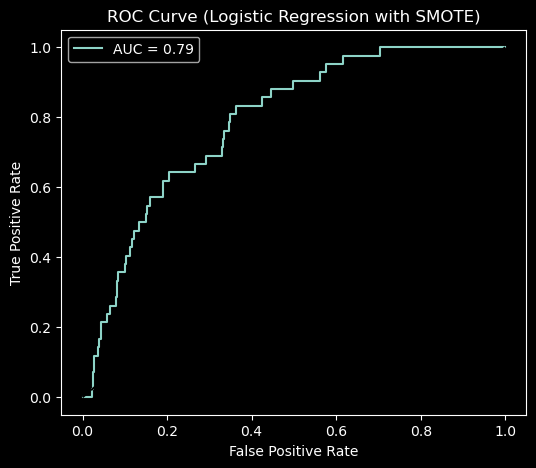

In [1257]:
lr_model_smote=LogisticRegression(C=10,penalty='l2',class_weight={0:1, 1:3})
lr_model_smote.fit(x_train_lin_os,y_train_lin_os)
y_pred_lr=lr_model_smote.predict(x_test_lin)
y_proba_lr=lr_model_smote.predict_proba(x_test_lin)[:,1]
print("Classification Report (SMOTE + Logistic Regression):")
print(classification_report(y_test_lin, y_pred_lr))

# ✅ Confusion matrix
cm = confusion_matrix(y_test_lin, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test_lin,y_proba_lr)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_lin, y_proba_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression with SMOTE)")
plt.legend()
plt.show()

               Feature  Importance
20  smoking_status_2.0    7.843593
21  smoking_status_3.0    7.383425
19  smoking_status_1.0    6.923355
13         work_type_2    6.486662
15         work_type_4    6.336342
17    Residence_type_1    6.298053
10      ever_married_1    6.273184
16    Residence_type_0    6.221410
7             gender_0    6.208353
18  smoking_status_0.0    6.196625
8             gender_1    6.001261
9       ever_married_0    5.974298
14         work_type_3    5.118751
11         work_type_0    5.093535
0                  age    2.101836
1         hypertension    2.086290
5            age_hyper    2.018396
6               hyp_hd    1.426641
2        heart_disease    0.672443
12         work_type_1    0.095700
3    avg_glucose_level    0.091158
4                  bmi    0.056157


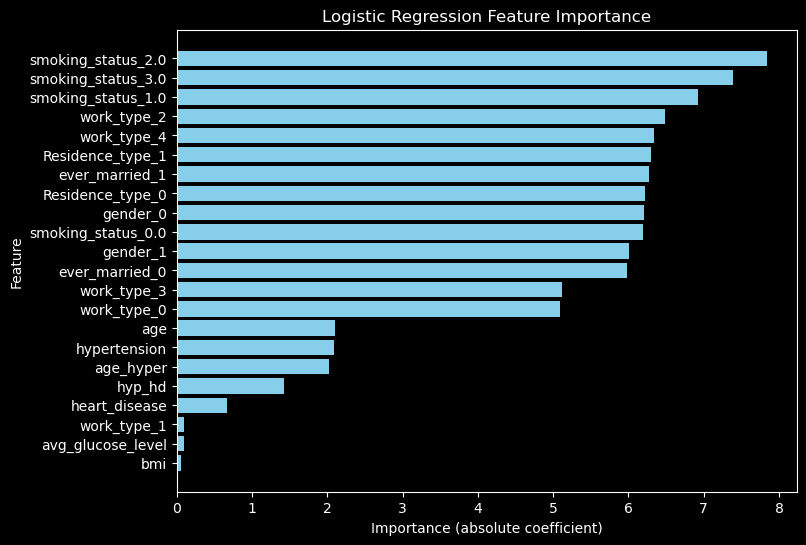

In [1260]:
feature_names = x_train_lin_os.columns  # or use X.columns if you have the DataFrame
coefficients = lr_model_smote.coef_[0]  # logistic regression coefficients

# ✅ Create dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  # take absolute value
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# ✅ Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Importance (absolute coefficient)")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()  # highest at top
plt.show()

Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       940
           1       0.12      0.57      0.20        42

    accuracy                           0.81       982
   macro avg       0.55      0.69      0.55       982
weighted avg       0.94      0.81      0.86       982

Confusion Matrix:
[[767 173]
 [ 18  24]]
ROC-AUC: 0.772049138804458


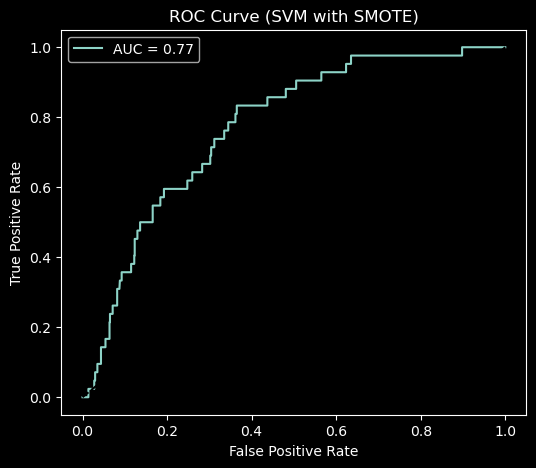

In [1262]:
svm_model_smote=SVC(C=10,kernel='linear',class_weight={0:1, 1:3},probability=True)
svm_model_smote.fit(x_train_lin_os,y_train_lin_os)
y_pred_svm=svm_model_smote.predict(x_test_lin)
y_proba_svm=svm_model_smote.predict_proba(x_test_lin)[:,1]
print("Classification Report (SMOTE + Logistic Regression):")
print(classification_report(y_test_lin, y_pred_svm))

# ✅ Confusion matrix
cm = confusion_matrix(y_test_lin, y_pred_svm)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test_lin,y_proba_svm)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_lin, y_proba_svm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM with SMOTE)")
plt.legend()
plt.show()

               Feature  Importance
15         work_type_4    5.337072
20  smoking_status_2.0    4.704387
21  smoking_status_3.0    4.156169
13         work_type_2    4.079265
19  smoking_status_1.0    3.866956
18  smoking_status_0.0    3.349100
14         work_type_3    3.052558
7             gender_0    2.968188
8             gender_1    2.855698
11         work_type_0    2.854716
17    Residence_type_1    2.787735
10      ever_married_1    2.738031
16    Residence_type_0    2.676398
9       ever_married_0    2.612385
1         hypertension    2.292152
5            age_hyper    2.228003
6               hyp_hd    1.922791
0                  age    1.482361
2        heart_disease    0.606436
3    avg_glucose_level    0.073589
4                  bmi    0.003574
12         work_type_1    0.000000


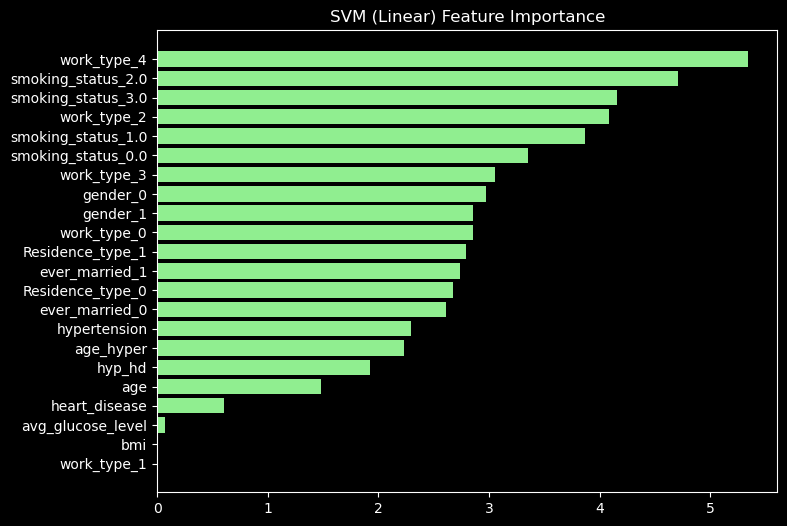

In [1264]:
svm_coefficients = svm_model_smote.coef_[0]

svm_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(svm_coefficients)
}).sort_values(by='Importance', ascending=False)

print(svm_importance)

plt.figure(figsize=(8,6))
plt.barh(svm_importance['Feature'], svm_importance['Importance'], color='lightgreen')
plt.title("SVM (Linear) Feature Importance")
plt.gca().invert_yaxis()
plt.show()


=== KNN with SMOTE ===
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       940
           1       0.06      0.14      0.09        42

    accuracy                           0.87       982
   macro avg       0.51      0.52      0.51       982
weighted avg       0.92      0.87      0.89       982

Confusion Matrix:
 [[847  93]
 [ 36   6]]
ROC-AUC: 0.6090298885511651


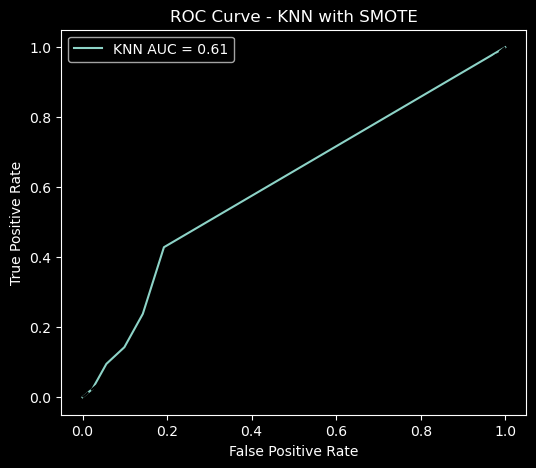

In [1265]:
knn_model_smote=KNeighborsClassifier(n_neighbors=5)
knn_model_smote.fit(x_train_lin_os,y_train_lin_os)
y_pred_knn=knn_model_smote.predict(x_test_lin)
y_proba_knn=knn_model_smote.predict_proba(x_test_lin)[:,1]
print("\n=== KNN with SMOTE ===")
print(classification_report(y_test_lin, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_lin, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test_lin, y_proba_knn))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_lin, y_proba_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"KNN AUC = {roc_auc_score(y_test_lin, y_proba_knn):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN with SMOTE")
plt.legend()
plt.show()

               Feature  Importance
17    Residence_type_1    0.034216
13         work_type_2    0.029939
16    Residence_type_0    0.024949
8             gender_1    0.024644
9       ever_married_0    0.020061
19  smoking_status_1.0    0.019145
7             gender_0    0.016701
18  smoking_status_0.0    0.016599
11         work_type_0    0.015275
21  smoking_status_3.0    0.010489
14         work_type_3    0.007637
20  smoking_status_2.0    0.006212
10      ever_married_1    0.004175
1         hypertension    0.001731
12         work_type_1    0.000000
6               hyp_hd    0.000000
15         work_type_4    0.000000
5            age_hyper   -0.001426
2        heart_disease   -0.001833
0                  age   -0.004277
4                  bmi   -0.006415
3    avg_glucose_level   -0.012118


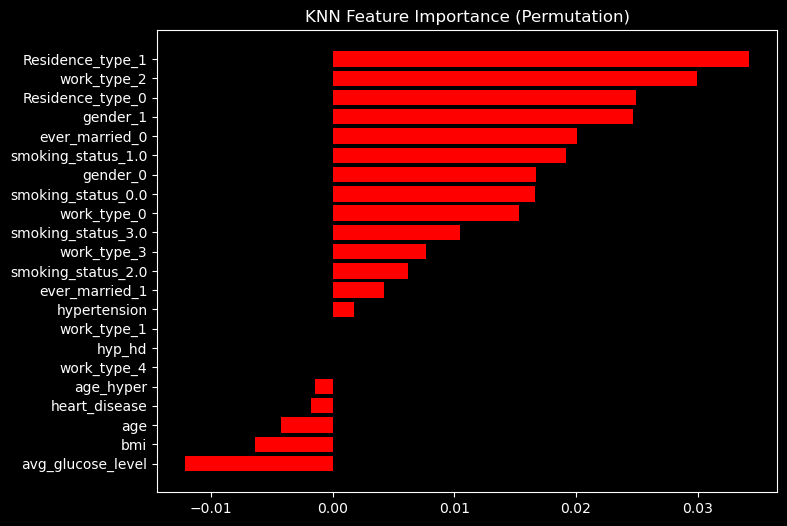

In [1266]:
result = permutation_importance(knn_model_smote, x_test_lin, y_test_lin, n_repeats=10, random_state=42)

knn_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(knn_importance)

plt.figure(figsize=(8,6))
plt.barh(knn_importance['Feature'], knn_importance['Importance'], color='red')
plt.title("KNN Feature Importance (Permutation)")
plt.gca().invert_yaxis()
plt.show()

=== Classification Report (SMOTE + Random Forest) ===
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       940
           1       0.09      0.48      0.16        42

    accuracy                           0.78       982
   macro avg       0.53      0.63      0.51       982
weighted avg       0.93      0.78      0.84       982

Confusion Matrix:
 [[744 196]
 [ 22  20]]
ROC-AUC: 0.7562056737588652


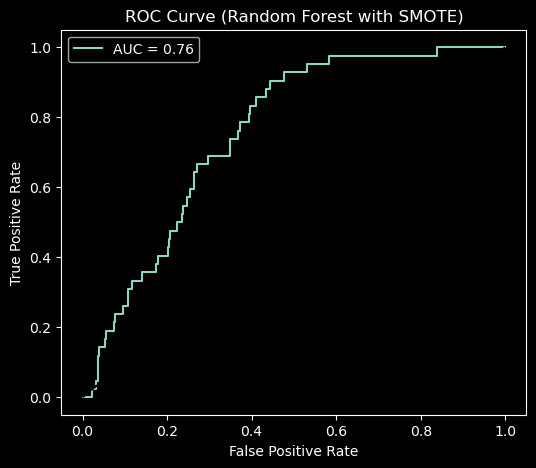

In [1267]:
rf_model_smote = RandomForestClassifier(class_weight={0:1, 1:5}, max_depth= 10, min_samples_split= 5, n_estimators= 100)
rf_model_smote.fit(x_train_tree_os, y_train_tree_os)

y_pred_rf = rf_model_smote.predict(x_test_tree)
y_proba_rf = rf_model_smote.predict_proba(x_test_tree)[:,1]

print("=== Classification Report (SMOTE + Random Forest) ===")
print(classification_report(y_test_tree, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test_tree, y_proba_rf))

fpr, tpr, _ = roc_curve(y_test_tree, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_tree, y_proba_rf):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest with SMOTE)")
plt.legend()
plt.show()

              Feature  Importance
1                 age    0.453654
9      smoking_status    0.147636
7   avg_glucose_level    0.101885
8                 bmi    0.079635
10          age_hyper    0.073134
5           work_type    0.070155
0              gender    0.025085
6      Residence_type    0.021073
4        ever_married    0.013346
2        hypertension    0.007321
3       heart_disease    0.005081
11             hyp_hd    0.001995


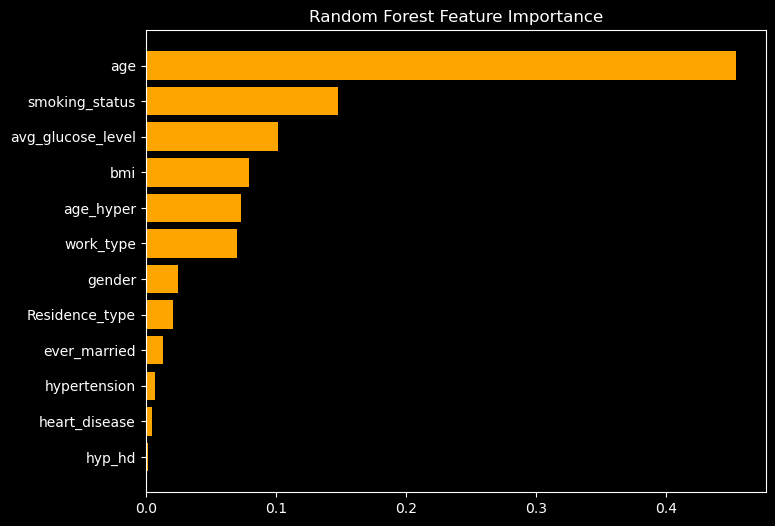

In [1268]:
feature_names_tree=x_train_tree_os.columns
rf_importance = pd.DataFrame({
    'Feature': feature_names_tree,
    'Importance': rf_model_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

plt.figure(figsize=(8,6))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='orange')
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

=== Classification Report (SMOTE + Gradient Boosting) ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.03      0.02      0.03        42

    accuracy                           0.92       982
   macro avg       0.49      0.49      0.49       982
weighted avg       0.92      0.92      0.92       982

Confusion Matrix:
 [[907  33]
 [ 41   1]]
ROC-AUC: 0.7554457953394123


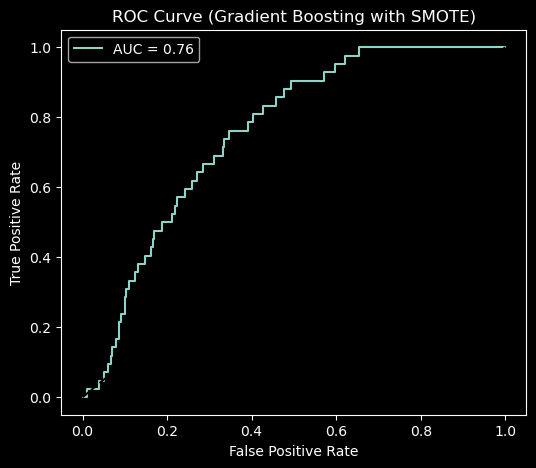

In [1269]:
gb_model_smote = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_model_smote.fit(x_train_tree_os, y_train_tree_os)

y_pred_gb = gb_model_smote.predict(x_test_tree)
y_proba_gb = gb_model_smote.predict_proba(x_test_tree)[:,1]

print("=== Classification Report (SMOTE + Gradient Boosting) ===")
print(classification_report(y_test_tree, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test_tree, y_proba_gb))

fpr, tpr, _ = roc_curve(y_test_tree, y_proba_gb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_tree, y_proba_gb):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Gradient Boosting with SMOTE)")
plt.legend()
plt.show()

              Feature  Importance
1                 age    0.496502
9      smoking_status    0.184528
10          age_hyper    0.113459
7   avg_glucose_level    0.057230
2        hypertension    0.043398
5           work_type    0.038479
8                 bmi    0.020743
6      Residence_type    0.020372
0              gender    0.014047
3       heart_disease    0.006574
4        ever_married    0.004406
11             hyp_hd    0.000262


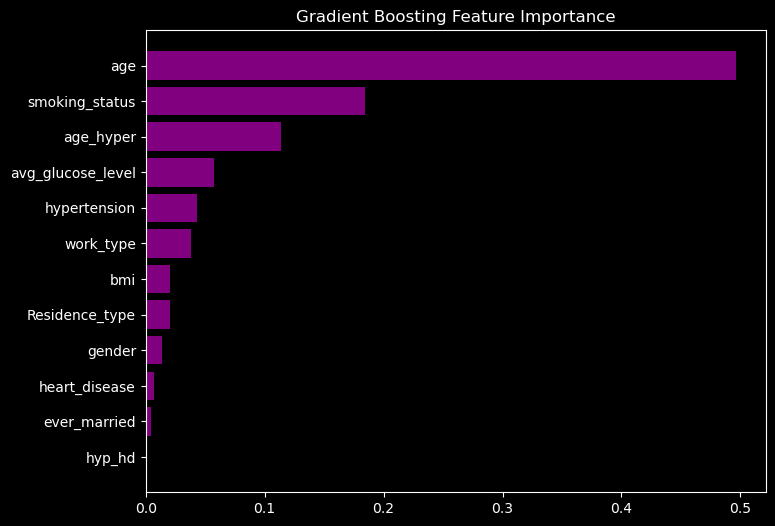

In [1271]:
gb_importance = pd.DataFrame({
    'Feature': feature_names_tree,
    'Importance': gb_model_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(gb_importance)

plt.figure(figsize=(8,6))
plt.barh(gb_importance['Feature'], gb_importance['Importance'], color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Voting Classifier

In [1273]:
estimator=[]
estimator.append(('Linear Regression',lr_model_smote))
estimator.append(('SVM',svm_model_smote))
estimator.append(('KNN',knn_model_smote))
estimator.append(('Random Forest',rf_model_smote))
estimator.append(('Gradient Boosting',gb_model_smote))

In [1274]:
VC_hard=VotingClassifier(estimators=estimator,voting='hard',weights=[2, 1, 0,1,0] )
VC_hard

VotingClassifier(estimators=[('Linear Regression',
                              LogisticRegression(C=10,
                                                 class_weight={0: 1, 1: 3})),
                             ('SVM',
                              SVC(C=10, class_weight={0: 1, 1: 3},
                                  kernel='linear', probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                     max_depth=10,
                                                     min_samples_split=5)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         n_estimators=200,
                                                         random_state=42))],
                 weights=[2, 1, 0, 1, 0])

In [1275]:
VC_hard.fit(x_train_lin_os,y_train_lin_os)
# ✅ Predictions
y_pred_vc = VC_hard.predict(x_test_lin)

# ✅ Classification Report
print("Classification Report (Voting Classifier - Hard):")
print(classification_report(y_test_lin, y_pred_vc))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test_lin, y_pred_vc)
print("Confusion Matrix:")
print(cm)

Classification Report (Voting Classifier - Hard):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       940
           1       0.12      0.57      0.20        42

    accuracy                           0.80       982
   macro avg       0.55      0.69      0.54       982
weighted avg       0.94      0.80      0.86       982

Confusion Matrix:
[[766 174]
 [ 18  24]]


In [1276]:
VC_soft=VotingClassifier(estimators=estimator,voting='soft',weights=[2, 1, 0,1,0])
VC_soft

VotingClassifier(estimators=[('Linear Regression',
                              LogisticRegression(C=10,
                                                 class_weight={0: 1, 1: 3})),
                             ('SVM',
                              SVC(C=10, class_weight={0: 1, 1: 3},
                                  kernel='linear', probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                     max_depth=10,
                                                     min_samples_split=5)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         n_estimators=200,
                                                         random_state=42))],
                 voting='soft', weights=[2, 1, 0, 1, 0])

In [1277]:
VC_soft.fit(x_train_lin_os,y_train_lin_os)
# ✅ Predictions
y_pred_vc = VC_soft.predict(x_test_lin)

# ✅ Classification Report
print("Classification Report (Voting Classifier - Soft):")
print(classification_report(y_test_lin, y_pred_vc))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test_lin, y_pred_vc)
print("Confusion Matrix:")
print(cm)

Classification Report (Voting Classifier - Soft):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       940
           1       0.13      0.57      0.21        42

    accuracy                           0.81       982
   macro avg       0.55      0.70      0.55       982
weighted avg       0.94      0.81      0.86       982

Confusion Matrix:
[[774 166]
 [ 18  24]]


In [1278]:
models_to_plot=[
    'LogisticRegression',
    'RandomForestClassifier',
    'GradientBoosting',
    'KNN',
    'SVM'
]

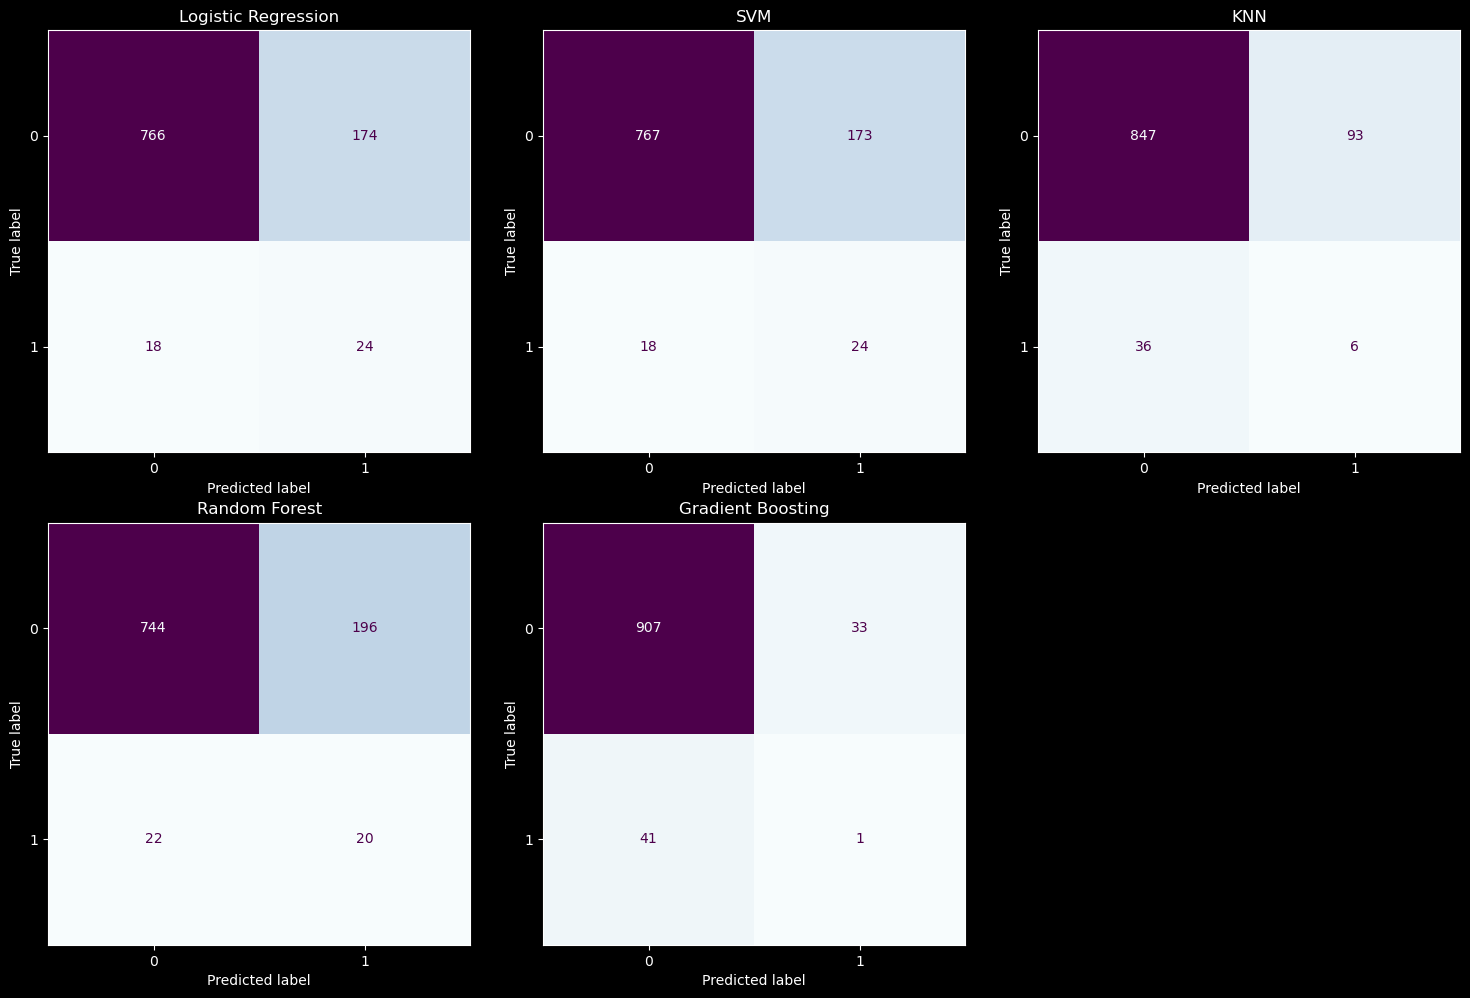

In [1279]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model_smote,
    "Gradient Boosting": gb_model_smote
}

# Predictions for each model
y_preds = {}
for name, model in models.items():
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        y_preds[name] = model.predict(x_test_lin)
    else:
        y_preds[name] = model.predict(x_test_tree)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot confusion matrices
for ax, (name, model) in zip(axes, models.items()):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test_lin if name in ['Logistic Regression','SVM','KNN'] else y_test_tree,
        y_preds[name],
        ax=ax,
        cmap="BuPu",
        colorbar=False
    )
    ax.set_title(name)

# Remove unused subplot (since we have 5 models, not 6)
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


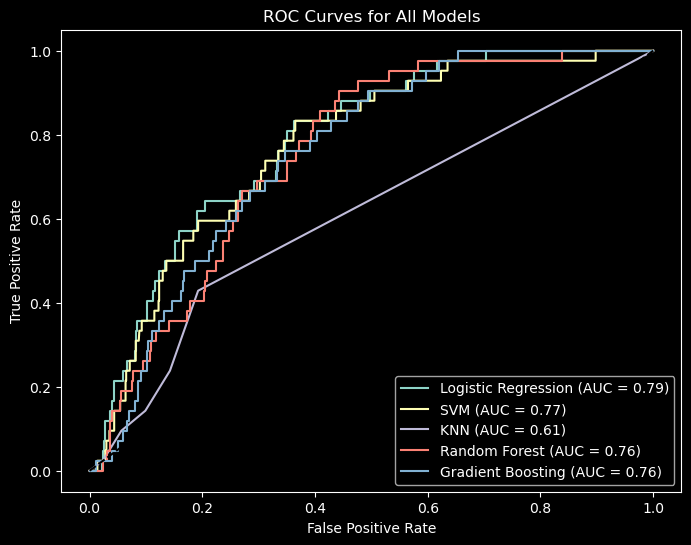

In [1282]:
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model_smote,
    "Gradient Boosting": gb_model_smote
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Select correct test set
    X_test = x_test_lin if name in ['Logistic Regression', 'SVM', 'KNN'] else x_test_tree
    y_test = y_test_lin if name in ['Logistic Regression', 'SVM', 'KNN'] else y_test_tree

    # Get probabilities (probability estimates or decision function)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # for SVM if probability=False (but you used probability=True, so fine)
        y_proba = model.decision_function(X_test)

    # Compute ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()


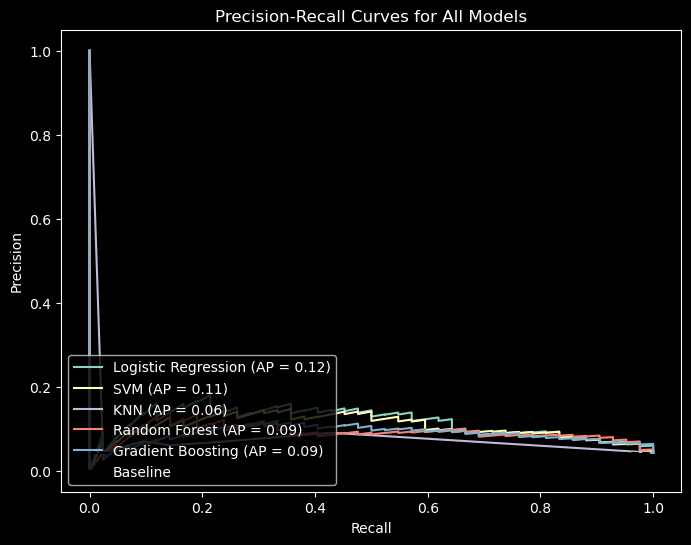

In [1283]:
from sklearn.metrics import precision_recall_curve, average_precision_score

models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model_smote,
    "Gradient Boosting": gb_model_smote
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Select correct test set
    X_test = x_test_lin if name in ['Logistic Regression', 'SVM', 'KNN'] else x_test_tree
    y_test = y_test_lin if name in ['Logistic Regression', 'SVM', 'KNN'] else y_test_tree

    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For SVM with decision_function
        y_proba = model.decision_function(X_test)

    # Compute Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_prec = average_precision_score(y_test, y_proba)

    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")

# Baseline
plt.hlines(y=sum(y_test) / len(y_test), xmin=0, xmax=1, colors='k', linestyles='--', label="Baseline")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Models")
plt.legend(loc="lower left")
plt.show()


In [1284]:
lr_model_smote.fit(x_train_lin_os, y_train_lin_os)
svm_model_smote.fit(x_train_lin_os, y_train_lin_os)
knn_model_smote.fit(x_train_lin_os, y_train_lin_os)
rf_model_smote.fit(x_train_tree_os, y_train_tree_os)
gb_model_smote.fit(x_train_tree_os, y_train_tree_os)

# =============================
# 2. Save trained models
# =============================
joblib.dump(lr_model_smote, "logistic_regression_smote.pkl")
joblib.dump(svm_model_smote, "svm_smote.pkl")
joblib.dump(knn_model_smote, "knn_smote.pkl")
joblib.dump(rf_model_smote, "random_forest_smote.pkl")
joblib.dump(gb_model_smote, "gradient_boosting_smote.pkl")

print("✅ All models saved successfully!")

# =============================
# 3. Example: Load a model back
# =============================
loaded_svm = joblib.load("svm_smote.pkl")

# Test loading works
y_pred_loaded = loaded_svm.predict(x_test_lin)
print("SVM Test Accuracy (Loaded Model):", (y_pred_loaded == y_test_lin).mean())

✅ All models saved successfully!
SVM Test Accuracy (Loaded Model): 0.8054989816700611


In [1285]:
os.makedirs("saved_models", exist_ok=True)
os.makedirs("saved_plots", exist_ok=True)

# =============================
# 1. Retrain all models
# =============================
lr_model_smote.fit(x_train_lin_os, y_train_lin_os)
svm_model_smote.fit(x_train_lin_os, y_train_lin_os)
knn_model_smote.fit(x_train_lin_os, y_train_lin_os)
rf_model_smote.fit(x_train_tree_os, y_train_tree_os)
gb_model_smote.fit(x_train_tree_os, y_train_tree_os)

models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model_smote,
    "Gradient Boosting": gb_model_smote
}

# =============================
# 2. Save trained models
# =============================
for name, model in models.items():
    filename = f"saved_models/{name.replace(' ', '_').lower()}_smote.pkl"
    joblib.dump(model, filename)
print("✅ All models saved successfully!\n")

# =============================
# 3. Evaluate, Save Metrics + Plots
# =============================
metrics = []

for name, model in models.items():
    # Pick correct test set
    if name in ["Logistic Regression", "SVM", "KNN"]:
        X_test, y_test = x_test_lin, y_test_lin
    else:
        X_test, y_test = x_test_tree, y_test_tree

    # Predictions
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM without predict_proba by default
        try:
            y_proba = model.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # scale 0-1
        except:
            y_proba = y_pred  # fallback
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"saved_plots/{name.replace(' ', '_').lower()}_confusion_matrix.png")
    plt.close()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.savefig(f"saved_plots/{name.replace(' ', '_').lower()}_roc.png")
    plt.close()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_pr = average_precision_score(y_test, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(recall, precision, label=f"AP = {avg_pr:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.savefig(f"saved_plots/{name.replace(' ', '_').lower()}_pr.png")
    plt.close()
    
    # Save metrics
    metrics.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-score (Class 1)": report["1"]["f1-score"],
        "ROC-AUC": roc_auc,
        "Avg Precision (PR AUC)": avg_pr
    })

# =============================
# 4. Save Metrics as CSV
# =============================
df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv("saved_models/model_metrics.csv", index=False)
print("📊 Metrics saved to saved_models/model_metrics.csv")
print(df_metrics)

✅ All models saved successfully!



TypeError: 'numpy.float64' object is not callable